https://selenium-python.readthedocs.io

> Download the related browser driver. We prefer Chrome web driver. Then add the exe's path into Environment Variables > Path section.
> Chrome : https://sites.google.com/chromium.org/driver/

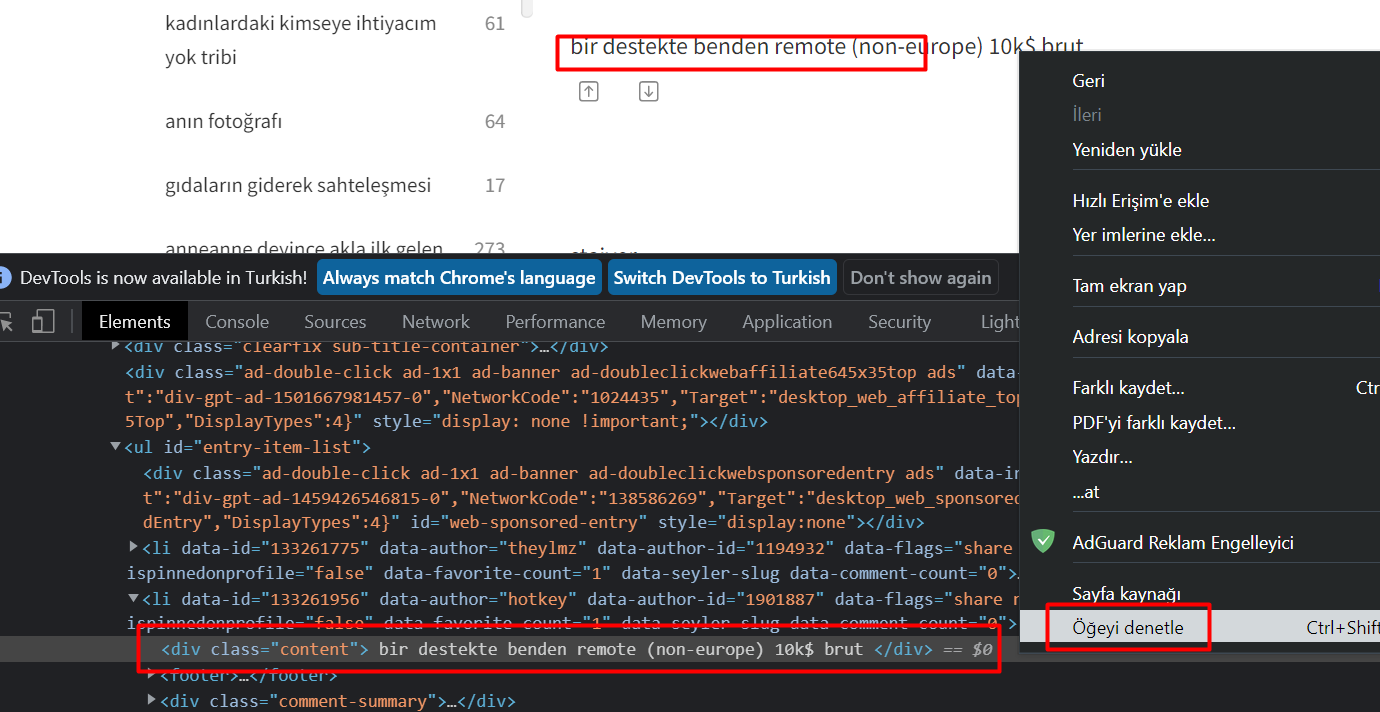

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import tqdm

In [42]:
# it will opens a browser. We choose Chrome
browser = webdriver.Chrome()

In [43]:
url = "https://eksisozluk.com/yazilimci-maasi--3199476?p=1"

In [44]:
# open the url in the browser
browser.get(url)

In [45]:
# class 'ı content olan tüm elementleri çek diyoruz
# find_element 1 adet seçerken find_elements denildiğinde tüm elementleri seçer
elements = browser.find_elements(By.CSS_SELECTOR, value='.content')
authors = browser.find_elements(By.CSS_SELECTOR, value='.entry-author')

visit the site to see all the alternatives to locate elements methods : https://selenium-python.readthedocs.io/locating-elements.html

In [54]:
entry_list = []
for element in elements:
    entry_list.append(element.text)

author_list = []
for author in authors:
    author_list.append(author.text)

In [55]:
entry_list[0]

'her ne kadar bilgisayar mühendisi maaşı olarak vucut buluyor gibi görünse de esasında piyasadaki yazılımcıların yarıya yakını bilgisayar mühendisi değildir. yüksekokul veya açıköğretimden tutun da matematik mühendisine kadar değişik bir skalada değişen lisanslara sahip kimseler, yazılım geliştiriciliği işinde çalışırlar. bu bakımdan "yazılımcı" ya da diğer bir deyişle programcı titri ayrıca ele alınmalıdır.\n\npiyasa ortalamasını kestirmek gerçekten güç. ancak, ülkemiz şartlarında deneyimsiz bir yazılımcı 1000-1500, orta seviye bir yazılımcı 2500-3500, deneyimli ve projeyi her yakasından tutup götürebilen lider özelliğinde senior bir yazılımcı ise 4000-7000 arası maaş aladurur..'

In [56]:
author_list[0]

'cekko'

### Pull all the entries from all pages

In [3]:
browser = webdriver.Chrome()

entry_list = []
author_list = []
for page in tqdm.tqdm(range(1,4)):
    url = "https://eksisozluk.com/yazilimci-maasi--3199476?p={0}".format(str(page))
    browser.get(url)
    elements = browser.find_elements(By.CSS_SELECTOR, value='.content')
    authors = browser.find_elements(By.CSS_SELECTOR, value='.entry-author')
    for element in elements:
        entry_list.append(element.text)
    for author in authors:
        author_list.append(author.text)
    time.sleep(0.1)
    
browser.close()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:57<00:00, 39.21s/it]


In [11]:
entries_df = pd.DataFrame( {'Author': author_list, 'Entry': entry_list } )
entries_df

,Author,Entry
0,cekko,her ne kadar bilgisayar mühendisi maaşı olarak...
1,evliya,(bkz: yazılımcı)\n(bkz: bilgisayarcı)
2,angry engineer,türkiye şartlarında çok iyi y*rr*ktır gibi bir...
3,highborn,"çalıştığım şirkette, 4 binden (euro, net, artı..."
4,zeusunkiziartemis,o kadar düşük maaş aldıklarını sanmıyorum zira...
5,tengri biz menen,sikecek şirketlere girerseniz junior olarak as...
6,kolbasti oynayan koala,2020 istatistiklerinin twitter’daki öncekiyazı...
7,whatdreamsnevercome,orta - orta iyi bir yazılımcı için saatlik ücr...
8,hisli velet,türkiye şartlarında değişkenlik gösteren maaşt...
9,ementess,*** 27 aralık 2021 tarihinde entryi güncelledi...
